## $\color{red}{\text{Lecture Overview}}$
1. **Dimensionality reduction**
2. **Principal components analysis**

## $\color{red}{\text{Dimensionality reduction}}$

1. The **curse of dimensionality** arises when data analysis and modeling may be adversely affected by the explosion of data
2. The curse of dimensionality has the following negative effects
  - Datasets may have hundreds or thousands of variables
  - It may be computationally expensive to analyze the data
  - Some variables may capture noise
  - Some independent variables may be irrelevant to the dependent variable
3. **Dimensionality reduction** refers to the process of curbing the effects of the curse of dimensionality
  - We use statistical and heuristic methods to obtain a subset of variables that may explain the phenomena
  - We can also use dimensionality reduction techniques to visualize the data

## $\color{red}{\text{Principal components analysis (PCA)}}$

1. PCA reduces a set high-dimensional variables to a lower-dimensional set of variables called **principal components**
2. **Principal components** are linear combination of the original variables and are uncorrelated with each other
3. Initial principal components capture most variation in the data
4. The **loadings** of each variable in the principal component may give an indication of its importance
4. PCA is also used to visualize high-dimensional datasets

### $\color{blue}{\text{Advantages of PCA}}$

- Principal components are uncorrelated
- PCA has many applications, making it very versatile

### $\color{blue}{\text{Disadvantages of PCA}}$

1. Does not seek to understand variable scales or distribution
2. It is affected by variable scales or units
  - Variables should be transformed
  - Variables should be standardized or normalized before PCA

## $\color{red}{\text{Import Required Packages}}$

In [1]:
import pandas as pd 
import numpy as np

# Set display options to show all columns and a large width
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)  # Adjust the width as needed

%matplotlib inline
import matplotlib.pylab as plt


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from kneed import KneeLocator

## $\color{red}{\text{Import Data}}$

In [ ]:
housing_df = pd.read_csv('housingData.csv')

## $\color{red}{\text{Analytic task}}$
1. Using the housing data, reduce the dimensions using PCA
2. Obtain variables coming out of the PCA

## $\color{red}{\text{Data transformation}}$


### $\color{blue}{\text{Standardization}}$

In [3]:
housing_df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,20141013T000000,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900.0
1,6414100192,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000.0
2,5631500400,20150225T000000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000.0
3,2487200875,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000.0
4,1954400510,20150218T000000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000.0


In [4]:
# Compute age of the building 
current_year = pd.Timestamp.now().year
housing_df['building_age'] = current_year - housing_df['yr_built']
#housing_df.head()

In [5]:
# Drop the following variables from the data - they are not needed for analysis
drop_vars = ['id', 'date', 'zipcode', 'yr_built', 'yr_renovated']
new_housing = housing_df.drop(drop_vars, axis=1)


# standardizing the data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(new_housing)

standardized_data # this is not a df; its a numpy array

array([[-0.39873715, -1.44746357, -0.97983502, ..., -0.26071541,
        -0.86641874,  0.54489777],
       [-0.39873715,  0.1756067 ,  0.53363434, ..., -0.18786773,
        -0.00594021,  0.6810785 ],
       [-1.47395936, -1.44746357, -1.42625404, ..., -0.17237524,
        -0.98047774,  1.29389179],
       ...,
       [-1.47395936, -1.77207762, -1.15404732, ..., -0.39414129,
        -0.37588065, -1.29354209],
       [-0.39873715,  0.50022075, -0.52252773, ..., -0.42051149,
        -0.38159993, -1.12331618],
       [-1.47395936, -1.77207762, -1.15404732, ..., -0.41794772,
        -0.58576282, -1.25949691]])

### $\color{blue}{\text{Component selection - explained variance approach}}$
1. The **explained variance** approach determines the number of principal components needed to retain a chosen percentage (e.g., 95%) of the total variance in the dataset

2. It ensures that enough components are selected to preserve most of the original data's information while reducing dimensionality.


#### $\color{green}{\text{Advantages and disadvantages}}$
1. **Advantages**
  - Provides a quantitative and objective method for component selection, ensuring minimal information loss
2. **Disadvantages**
  - The threshold (e.g., 95%) is arbitrary and may lead to either too many or too few components being retained.

In [6]:
new_housing.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,price,building_age
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,47.5112,-122.257,1340,5650,221900.0,70
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,47.7210,-122.319,1690,7639,538000.0,74
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,47.7379,-122.233,2720,8062,180000.0,92
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,47.5208,-122.393,1360,5000,604000.0,60
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,47.6168,-122.045,1800,7503,510000.0,38


### $\color{blue}{\text{Component selection - the scree plot}}$
1. The **scree plot** visualizes the explained variance of each principal component, helping identify the optimal number of components to retain in PCA.

2. It allows for **elbow detection**, where the variance gain diminishes, indicating an ideal cutoff point for dimensionality reduction.

#### $\color{green}{\text{Advantages and disadvantages}}$
1. **Advantages**
  - Simple to interpret, provides a visual way to determine how many components to keep
2. **Disadvantages**
  - The "elbow" point is subjective and may not always be clearly defined

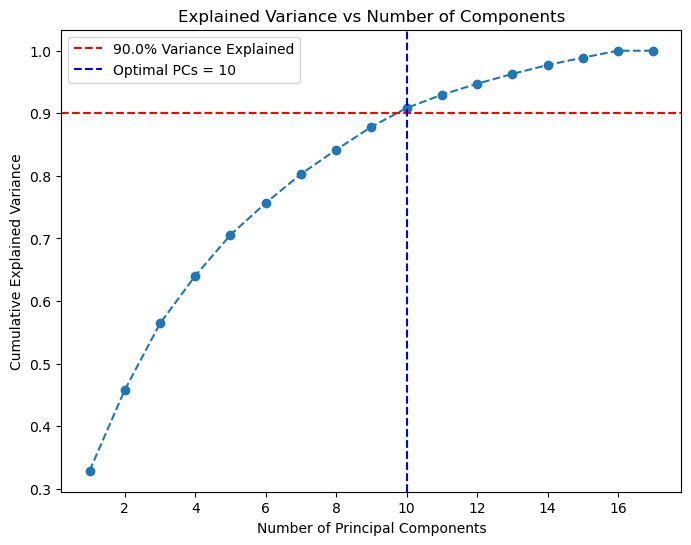

In [7]:
# apply PCA without specifying the number of components keeps all
pca = PCA()
pca.fit(standardized_data)

# compute the explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)


# fund the number of components that explains at least some threshold of variance
threshold = 0.9
n_components_thresh = np.argmax(cumulative_variance >= threshold) + 1
#n_components_thresh

# plot the cumulative explained variance
plt.figure(figsize=(8,6))
plt.plot(range(1,len(cumulative_variance ) + 1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=threshold, color='r', linestyle='--', label=f'{threshold*100}% Variance Explained')
plt.axvline(x=n_components_thresh, color='b', linestyle='--', label=f'Optimal PCs = {n_components_thresh}')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs Number of Components")
plt.legend()
plt.show()

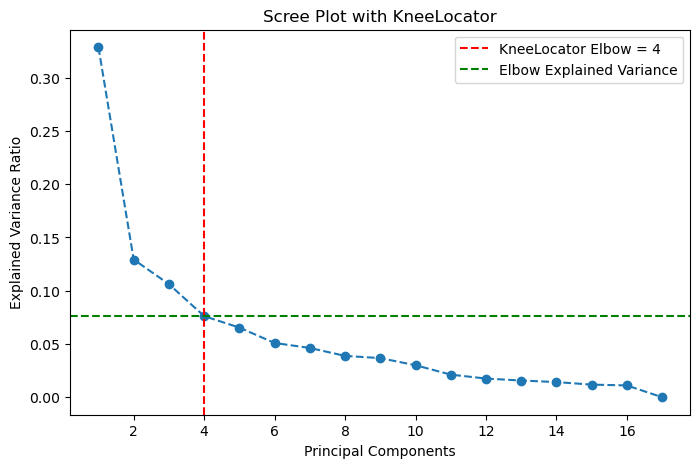

In [12]:

# Find the elbow point mathemetically
knee_locator = KneeLocator(range(1, len(explained_variance) + 1), explained_variance, curve='convex', direction='decreasing')
scree_components = knee_locator.knee

# scree plot with knee locator
plt.figure(figsize=(8,5))
plt.plot(range(1,len(explained_variance ) + 1), explained_variance, marker='o', linestyle='--')
plt.axvline(x=scree_components, color='r', linestyle='--', label=f'KneeLocator Elbow = {scree_components}')
plt.axhline(y=explained_variance[scree_components-1], color='g', linestyle='--', label=f'Elbow Explained Variance')
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot with KneeLocator")
plt.legend()
plt.show()

According to the knee locator, we're going to need 4 principal components. The pca method said to use 10 principal components to explain at least 90% vairance. what percent of cumulative variance does the 4 principal components have

In [13]:
# compare cumulative explained variance for both methods
exp_varScree = np.sum(explained_variance[:scree_components])
exp_varThresh = np.sum(explained_variance[:n_components_thresh])

print(f"Percentage of variance explained by {scree_components} components: {exp_varScree:.2%}")
print(f"Percentage of variance explained by {n_components_thresh} components: {exp_varThresh:.2%}")

Percentage of variance explained by 4 components: 64.03%
Percentage of variance explained by 10 components: 90.84%


## $\color{red}{\text{Applying PCA}}$

In [20]:
# Conduct PCA using optimal number of components
pca = PCA(n_components=n_components_thresh)
housing_pca = pca.fit_transform(standardized_data)
#housing_pca

# Convert PCA results to dataframe
housing_pca_df = pd.DataFrame(housing_pca, columns=[f'PC{i+1}' for i in range(housing_pca.shape[1])])
housing_pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-2.559576,-0.390721,0.016333,0.282908,-0.112909,-0.271385,0.213558,-0.248320,-0.872573,-0.087185
1,-0.026299,0.299523,-0.843729,0.247204,1.280942,-0.471283,-0.590427,0.336089,-0.188552,-0.008823
2,-2.892039,0.102178,0.182927,0.686772,1.360391,-0.008250,1.451650,-0.501816,-0.783135,0.104251
3,-0.850740,2.161896,0.019423,-1.741151,-0.856692,0.275158,-1.155702,0.686873,1.508809,-0.412923
4,-0.390186,-0.960203,-0.064851,0.146920,0.231865,-0.016982,1.497014,0.087628,-0.088560,-0.063445


### $\color{blue}{\text{Finding influential variables}}$

1. Compute the absolute **loadings** for each variable in the PCs
  - **Loadings** are the coefficients (weights) that show how much each original variable contributes to a principal component (PC)
  - The larger the absolute loadings, the more influence the variable has on the PC
2. Select variables with consistently high loadings across multiple
3. Set some selection criteria
  - For us, a variable is important if the absolute value of its loading exceeds the median load across all PCS

In [23]:
# Display the loadings of each variable in each PC
var_names = new_housing.columns
housing_loadings = pd.DataFrame(pca.components_.T, index=var_names, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
housing_loadings.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
bedrooms,0.237067,0.097978,-0.048910,-0.406783,-0.195498,-0.064896,-0.195892,0.477480,-0.427722,0.342102
bathrooms,0.352553,-0.020713,-0.106613,-0.109422,-0.090264,-0.134005,-0.153045,0.150956,0.265689,0.000409
sqft_living,0.393238,0.117294,0.017791,-0.141985,-0.030645,-0.023364,-0.010124,-0.054510,-0.081100,-0.118257
sqft_lot,0.091369,-0.108046,0.619673,0.041611,0.203139,-0.118322,-0.210498,0.061709,0.028028,0.012207
floors,0.222183,-0.272722,-0.256816,0.218370,0.119533,0.097117,-0.444442,0.140476,0.227256,0.214457


In [24]:
# Compute absolute loadings
abs_loadings = np.abs(pca.components_)

# compute median loading across all PCs
median_loadings =  np.median(abs_loadings)

# identify important variables (those loadings that exceed the median loading)
important_vars = np.any(abs_loadings > median_loadings, axis=0)

# extract var names
important_features = np.array(var_names)[important_vars]
important_features

array(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'price', 'building_age'], dtype=object)

In [28]:
len(important_features) + len(drop_vars)

22

In [30]:
housing_df.shape[1]

22

... that didnt reduce anything